NOTE: Dataset is too large to be committed to github, download & move csv file into working directory

In [ ]:
%pip install matplotlib
%pip install pandas

In [62]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Perceptron

In [23]:
#data preperation
df = pd.DataFrame(pd.read_csv("creditcard.csv"))

X_data = df[['V11', 'V12', 'V14', 'V16', 'V27', 'V28']]
y_data = df['Class']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(sss.split(X_data, y_data))

X_train = X_data.loc[train_index]
y_train = y_data.loc[train_index]

X_test = X_data.loc[test_index]
y_test = y_data.loc[test_index]

KNN Classifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
knn.fit(X_train, y_train)
scores = knn.predict_proba(X_test)
y_pred_knn = knn.predict(X_test)

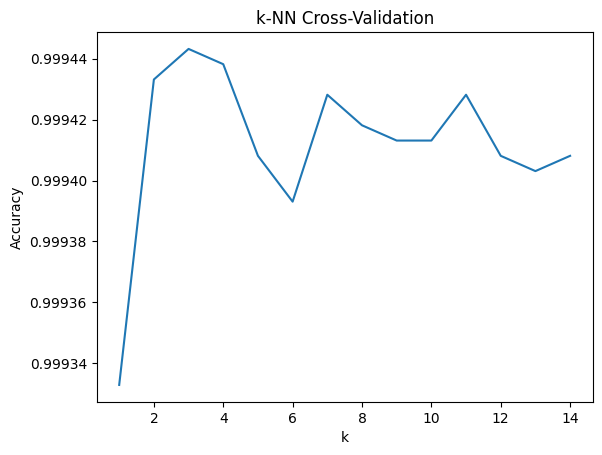

Optimal k-value: 3


In [26]:
k_values = list(range(1, 15))

#this loop takes so long
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train,y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

# Plot results
plt.plot(k_values, cv_scores)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k-NN Cross-Validation")
plt.show()

# Determine optimal k-value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k-value:", optimal_k)

Accuracy: 0.9994265182636377
Precision: 0.9304347826086956
Recall: 0.722972972972973
F1 Score: 0.8136882129277566


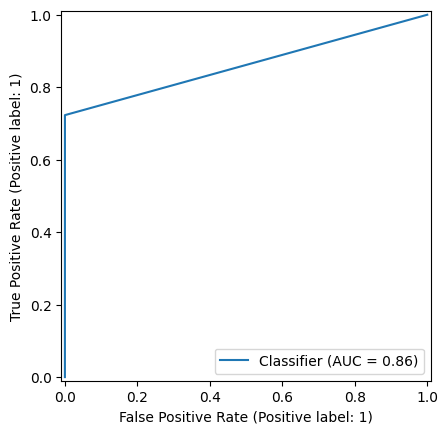

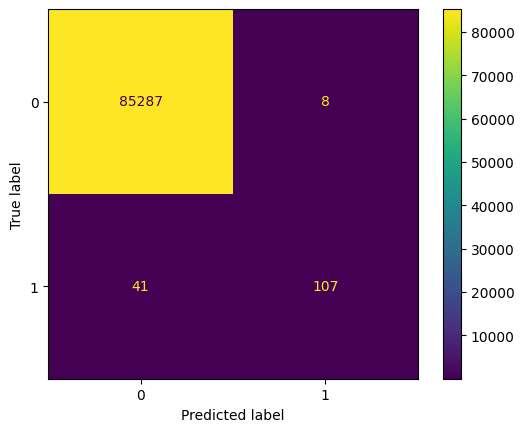

In [64]:
#metrics
conf_matrix = confusion_matrix(y_test,y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Random Forest

In [48]:
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)

y_pred_rf = randforest.predict(X_test)

scores = randforest.predict_proba(X_test)

In [ ]:
#TODO:
#tune hyperparameter, ref: https://www.datacamp.com/tutorial/random-forests-classifier-python
#plot tree

Accuracy: 0.9994499256814484
Precision: 0.9316239316239316
Recall: 0.7364864864864865
F1 Score: 0.8226415094339623


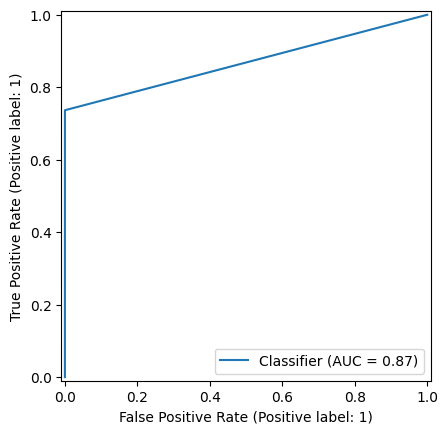

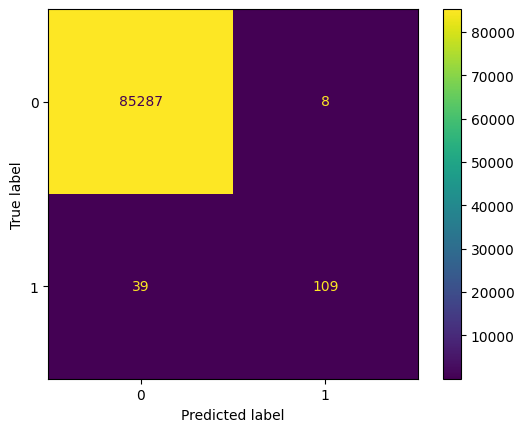

In [65]:
conf_matrix = confusion_matrix(y_test,y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=randforest.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

AdaBoost

In [ ]:
#ref: https://www.datacamp.com/tutorial/adaboost-classifier-python
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [52]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

Accuracy: 0.9989817773252344
Precision: 0.7904761904761904
Recall: 0.5608108108108109
F1 Score: 0.6561264822134387


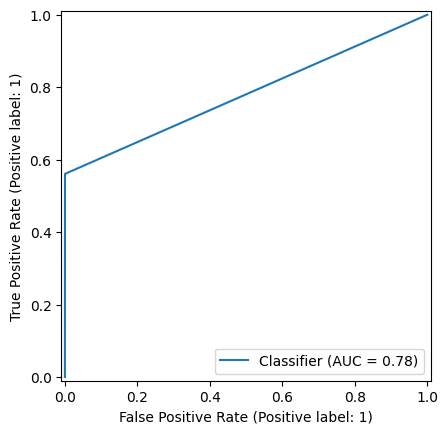

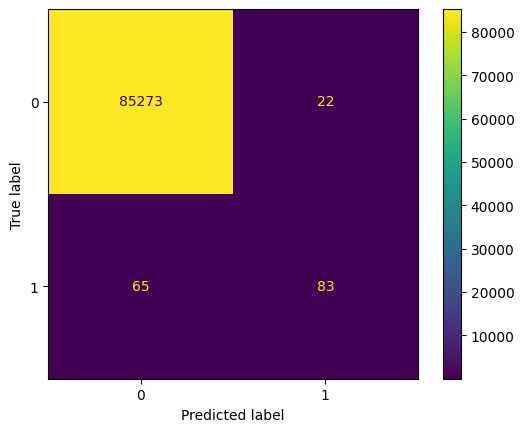

In [67]:
conf_matrix = confusion_matrix(y_test,y_pred_ada)
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ada.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Perceptron (Neural Network)

In [ ]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [68]:
perceptron = Perceptron(class_weight="balanced")
perceptron.fit(X_train, y_train)
y_pred_pt = perceptron.predict(X_test)

In [ ]:
#TODO
#tune class weights
#tune learning rate

Accuracy: 0.9666327259108412
Precision: 0.04263959390862944
Recall: 0.8513513513513513
F1 Score: 0.08121173058330648


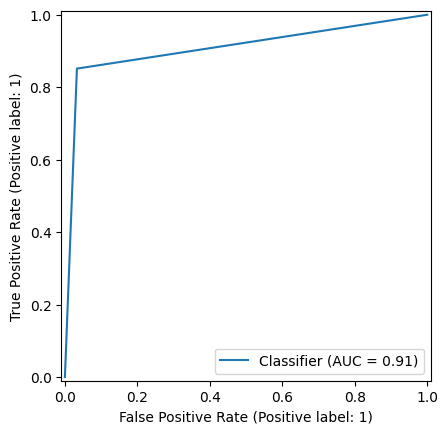

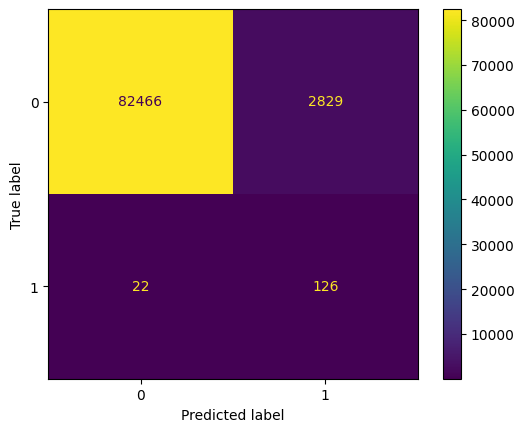

In [69]:
conf_matrix = confusion_matrix(y_test,y_pred_pt)
accuracy = accuracy_score(y_test, y_pred_pt)
precision = precision_score(y_test, y_pred_pt)
recall = recall_score(y_test, y_pred_pt)
f1 = f1_score(y_test, y_pred_pt)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_pt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=perceptron.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Preprocessing/Feature Analysis

In [ ]:
#create dataframes

df = pd.DataFrame(pd.read_csv("creditcard.csv"))

frauds = df.where(df["Class"] == 1)
frauds.dropna(inplace=True)
print(frauds.head())

legit = df.where(df["Class"] == 0)
legit.dropna(inplace=True)

legit = legit.sample(frac=0.005, replace=False, random_state=1)

In [ ]:
#plots
plt.scatter(frauds['Time'], frauds['V1'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V1'], color="blue", label='Legitimate')

plt.title("V1")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V2'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V2'], color="blue", label='Legitimate')

plt.title("V2")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V3'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V3'], color="blue", label='Legitimate')

plt.title("V3")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V4'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V4'], color="blue", label='Legitimate')

plt.title("V4")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V5'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V5'], color="blue", label='Legitimate')

plt.title("V5")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V6'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V6'], color="blue", label='Legitimate')

plt.title("V6")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V7'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V7'], color="blue", label='Legitimate')

plt.title("V7")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V8'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V8'], color="blue", label='Legitimate')

plt.title("V8")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V9'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V9'], color="blue", label='Legitimate')

plt.title("V9")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V10'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V10'], color="blue", label='Legitimate')

plt.title("V10")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V11'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V11'], color="blue", label='Legitimate')

plt.title("V11")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V12'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V12'], color="blue", label='Legitimate')

plt.title("V12")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V13'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V13'], color="blue", label='Legitimate')

plt.title("V13")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V14'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V14'], color="blue", label='Legitimate')

plt.title("V14")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V15'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V15'], color="blue", label='Legitimate')

plt.title("V15")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V16'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V16'], color="blue", label='Legitimate')

plt.title("V16")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V17'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V17'], color="blue", label='Legitimate')

plt.title("V17")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V18'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V18'], color="blue", label='Legitimate')

plt.title("V18")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V19'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V19'], color="blue", label='Legitimate')

plt.title("V19")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V20'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V20'], color="blue", label='Legitimate')

plt.title("V20")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V21'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V21'], color="blue", label='Legitimate')

plt.title("V21")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V22'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V22'], color="blue", label='Legitimate')

plt.title("V22")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V23'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V23'], color="blue", label='Legitimate')

plt.title("V23")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V24'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V24'], color="blue", label='Legitimate')

plt.title("V24")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V25'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V25'], color="blue", label='Legitimate')

plt.title("V25")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V26'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V26'], color="blue", label='Legitimate')

plt.title("V26")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()


plt.scatter(frauds['Time'], frauds['V27'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V27'], color="blue", label='Legitimate')

plt.title("V27")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V28'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V28'], color="blue", label='Legitimate')

plt.title("V28")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['Amount'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['Amount'], color="blue", label='Legitimate')

plt.title("Amount")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()